In [1]:
import mdtraj as md
import barnaba as bb

traj = md.load("SL5A_50K.xtc",top="SL5a_ext_gmx.pdb",stride=2)
print(traj)
gvecs,res = bb.dump_gvec_traj(traj)
ll=len(res)

<mdtraj.Trajectory with 25019 frames, 1049 atoms, 33 residues, and unitcells>


(25019, 4356)
# Cumulative explained variance of component: 1= 14.4 2:= 24.9 3= 30.7


Text(0, 0.5, 'PC2')

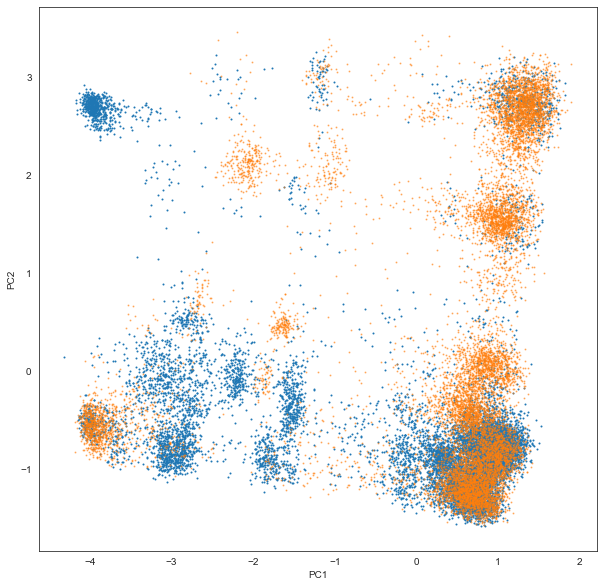

In [8]:
import barnaba.cluster as cc

gvecs = gvecs.reshape(gvecs.shape[0],-1)
print(gvecs.shape)

vint,wint = cc.pca(gvecs,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vint[0]*100,vint[1]*100,vint[2]*100))


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecs.shape[0]/2)
plt.scatter(wint[:lhalf,0],wint[:lhalf,1],s=1)
plt.scatter(wint[lhalf:,0],wint[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [9]:
import umap
fit = umap.UMAP(n_neighbors=100)
u = fit.fit_transform(gvecs)

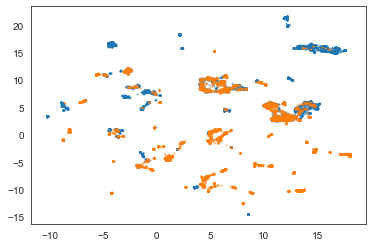

In [13]:
plt.scatter(u[:lhalf,0],u[:lhalf,1],s=1,alpha=0.5)
plt.scatter(u[lhalf:,0],u[lhalf:,1],s=1,alpha=0.5)

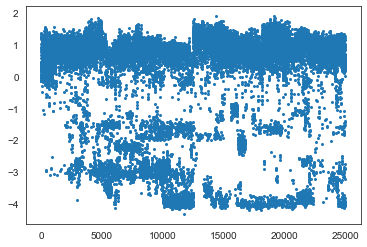

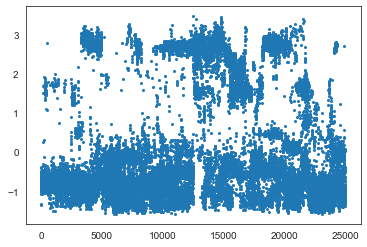

In [6]:
plt.plot(wint[:,0],"o",markersize=2)
plt.show()
plt.close()
plt.plot(wint[:,1],"o",markersize=2)

In [5]:
import numpy as np
ll = len(res)
print(len(res))
new_labels, center_idx = cc.dbscan(gvecs,range(gvecs.shape[0]),eps=0.5,min_samples=100)

33
# eps:2.872 min_samples:100  nclusters: 16
#  silhouette score: 0.0306
# Avg silhouette: 0.2135 
# assigned samples :15267 total samples:25019 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 7626                1.138                0.715                0.870                0.606 02 9814
# 01 2267                0.972                0.639                0.741                0.551 00 217
# 02 1069                0.886                0.581                0.720                0.495 05 11147
# 03 0800                0.916                0.631                0.709                0.553 03 15080
# 04 0609                0.871                0.592                0.725                0.500 04 19444
# 05 0539                0.800                0.527                0.658                0.444 10 10152
# 06 0482                0.818                0.521                0.622                0.441 01 146
# 07 0338                0.886     

t1 9814
t1 217
t1 11147
t1 15080
t1 19444
t1 10152
t1 146
t1 20951
t1 24370
t1 9868
t1 6686
t1 16258
t1 18533
t1 13414
t1 17919
t1 7144


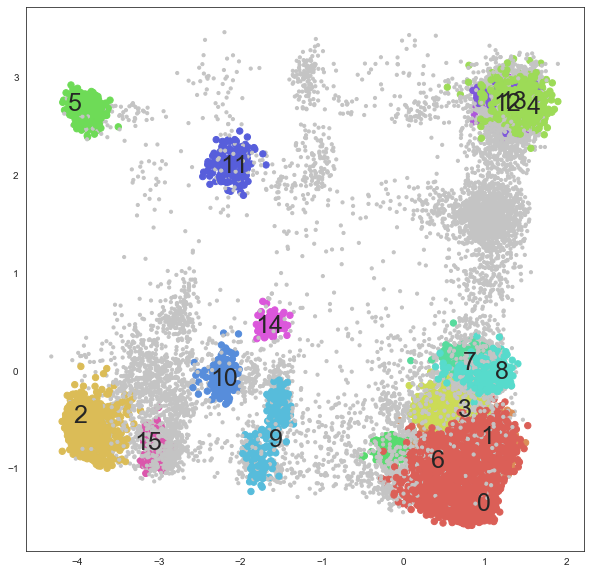

In [11]:
cp = sns.color_palette("hls",len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecs.shape[0]
plt.scatter(wint[:,0],wint[:,1],s=size,c=colors)
for i,k in enumerate(center_idx):
    plt.text(wint[k,0],wint[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_SL5A_%d.pdb" %i )